In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
df = pd.read_csv("stock.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,"Jun 13, 2022",107.45,109.22,106.59,106.88,"18,37,810"
1,"Jun 14, 2022",106.89,108.46,106.35,107.19,"12,74,047"
2,"Jun 15, 2022",108.90,112.06,108.12,110.39,"16,59,601"
3,"Jun 16, 2022",108.15,109.29,105.79,106.64,"17,65,662"
4,"Jun 17, 2022",106.54,109.25,105.63,107.87,"21,75,833"
...,...,...,...,...,...,...
245,"Jun 5, 2023",124.61,127.99,124.38,126.63,"2,26,72,516"
246,"Jun 6, 2023",126.60,128.88,125.97,127.91,"1,94,50,128"
247,"Jun 7, 2023",127.58,129.55,122.63,122.94,"3,41,79,348"
248,"Jun 8, 2023",122.59,123.73,122.01,122.67,"2,48,14,996"


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["Close"]])

In [5]:
sequence_length = 10
sequences = []
targets = []

In [6]:
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
    targets.append(scaled_data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

In [8]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(sequence_length, 1)))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

In [9]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)

In [10]:
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
3/3 [==============================] - 12s 1s/step - loss: 0.1107 - val_loss: 0.0171
Epoch 2/500
3/3 [==============================] - 0s 81ms/step - loss: 0.0436 - val_loss: 0.0225
Epoch 3/500
3/3 [==============================] - 0s 81ms/step - loss: 0.0170 - val_loss: 0.0235
Epoch 4/500
3/3 [==============================] - 0s 73ms/step - loss: 0.0253 - val_loss: 0.0342
Epoch 5/500
3/3 [==============================] - 0s 120ms/step - loss: 0.0242 - val_loss: 0.0163
Epoch 6/500
3/3 [==============================] - 0s 124ms/step - loss: 0.0129 - val_loss: 0.0106
Epoch 7/500
3/3 [==============================] - 0s 76ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 8/500
3/3 [==============================] - 0s 121ms/step - loss: 0.0145 - val_loss: 0.0095
Epoch 9/500
3/3 [==============================] - 0s 74ms/step - loss: 0.0105 - val_loss: 0.0113
Epoch 10/500
3/3 [==============================] - 0s 74ms/step - loss: 0.0121 - val_loss: 0.0133
Epoch 11/500
3/3 

3/3 [==============================] - 0s 79ms/step - loss: 0.0044 - val_loss: 0.0056
Epoch 84/500
3/3 [==============================] - 0s 78ms/step - loss: 0.0046 - val_loss: 0.0061


In [11]:
model.load_weights("best_model.h5")

In [12]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

2/2 [==============================] - 3s 15ms/step


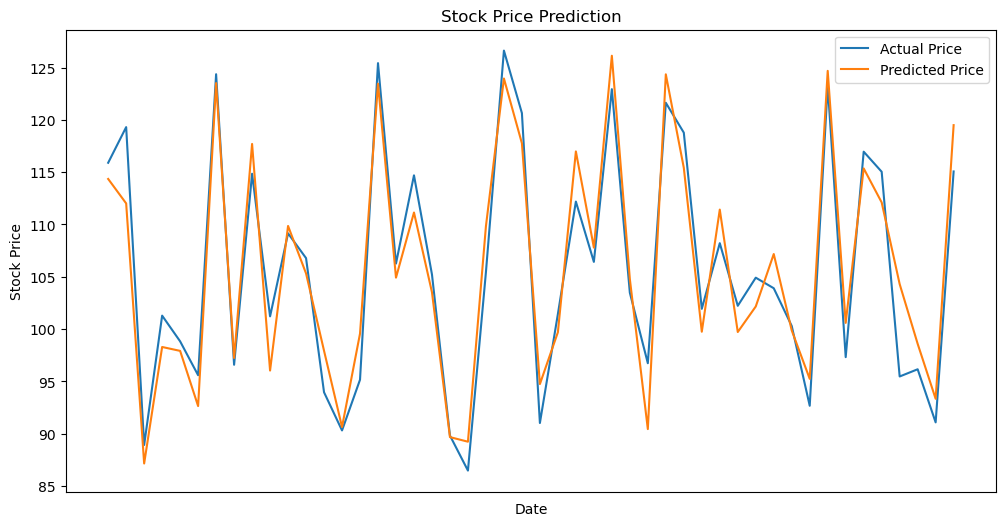

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"].iloc[-len(actual_prices):], actual_prices, label="Actual Price")
plt.plot(df["Date"].iloc[-len(predictions):], predictions, label="Predicted Price")
plt.xticks([])
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()